In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading xlsx(excel file)
data=pd.read_excel('University_Clustering.xlsx')

In [ ]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [ ]:
univ=data.drop(columns='State',axis=1)

In [ ]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
univ.shape

(25, 7)

In [ ]:
univ.Univ.unique()

array(['Brown', 'CalTech', 'CMU', 'Columbia', 'Cornell', 'Dartmouth',
       'Duke', 'Georgetown', 'Harvard', 'JohnsHopkins', 'MIT',
       'Northwestern', 'NotreDame', 'PennState', 'Princeton', 'Purdue',
       'Stanford', 'TexasA&M', 'UCBerkeley', 'UChicago', 'UMichigan',
       'UPenn', 'UVA', 'UWisconsin', 'Yale'], dtype=object)

In [ ]:
univ.Univ.value_counts()

Brown           1
PennState       1
UWisconsin      1
UVA             1
UPenn           1
UMichigan       1
UChicago        1
UCBerkeley      1
TexasA&M        1
Stanford        1
Purdue          1
Princeton       1
NotreDame       1
CalTech         1
Northwestern    1
MIT             1
JohnsHopkins    1
Harvard         1
Georgetown      1
Duke            1
Dartmouth       1
Cornell         1
Columbia        1
CMU             1
Yale            1
Name: Univ, dtype: int64

In [ ]:
univ.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [ ]:
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [ ]:
# we need to scale down the featuers
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale=MinMaxScaler()
data1=scale.fit_transform(univ.iloc[:,1:])

In [ ]:
# importing the algorithm
from sklearn.cluster import KMeans 

In [ ]:
T_WSS=[]
k=list(range(2,9))

In [ ]:
k

[2, 3, 4, 5, 6, 7, 8]

In [ ]:
for i in k:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data1)
  T_WSS.append(kmeans.inertia_)
# inertia_ returns the TWSS


In [ ]:
T_WSS

[4.123452442397178,
 2.9556843285735432,
 2.3160668481308337,
 1.678132684074635,
 1.4758031742849491,
 1.20962100204299,
 1.0291133191249704]

([<matplotlib.lines.Line2D at 0x7f7e525a4d50>],
 Text(0.5, 0, 'No. of Clusters'),
 Text(0, 0.5, 'TWSS'))

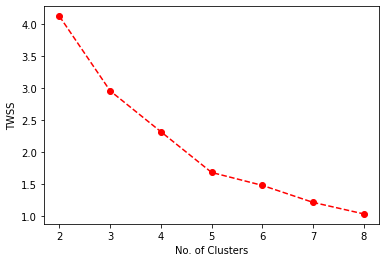

In [ ]:
plt.plot(k,T_WSS,'ro--'),plt.xlabel('No. of Clusters'),plt.ylabel('TWSS')

In [ ]:
# it small dataset so we consider here the 3 cluster
model=KMeans(n_clusters=3)
model.fit(data1)

KMeans(n_clusters=3)

In [ ]:
# Getting lables
model.labels_

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1], dtype=int32)

In [ ]:
mb=pd.Series(model.labels_)
mb

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     1
10    1
11    2
12    2
13    0
14    1
15    0
16    1
17    0
18    2
19    2
20    2
21    2
22    2
23    0
24    1
dtype: int32

In [ ]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
# Lets add the cluster data to the univ
univ['Cluster']=mb
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,2


In [ ]:
univ.tail()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
20,UMichigan,1180,65,68,16,15470,85,2
21,UPenn,1285,80,36,11,27553,90,2
22,UVA,1225,77,44,14,13349,92,2
23,UWisconsin,1085,40,69,15,11857,71,0
24,Yale,1375,95,19,11,43514,96,1


In [ ]:
# Rearranging COlumns
UNIV=univ.iloc[:,[7,0,1,2,3,4,5,6]]

In [ ]:
UNIV

,Cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,2,CMU,1260,62,59,9,25026,72
3,1,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90
5,1,Dartmouth,1340,89,23,10,32162,95
6,1,Duke,1315,90,30,12,31585,95
7,2,Georgetown,1255,74,24,12,20126,92
8,1,Harvard,1400,91,14,11,39525,97
9,1,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# coveting dataframe to csv
UNIV.to_csv('Univ.csv',encoding='utf-8')

In [ ]:
import os
os.getcwd()

'/content'